In [2141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2142]:
#Read the file
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2143]:
df.iloc[899:900]

,age,sex,bmi,children,smoker,region,charges
899,19,female,22.515,0,no,northwest,2117.33885


In [2144]:
#Check the shape
df.shape

(1338, 7)

In [2145]:
#Check the structure of the dat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2146]:
# Statistical summary of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2147]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [2148]:
# Check for dupplicate records
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [2149]:
# drop the duplicate record
df.drop_duplicates(inplace=True)

In [2150]:
df.shape

(1337, 7)

In [2151]:
df1=df.copy()

In [2152]:
# Check for missing values
for i in df.columns.values:
    print(i+':',df[i].isna().sum())

age: 0
sex: 0
bmi: 0
children: 0
smoker: 0
region: 0
charges: 0


In [2153]:
# From above we can understand there no missing values in each column

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


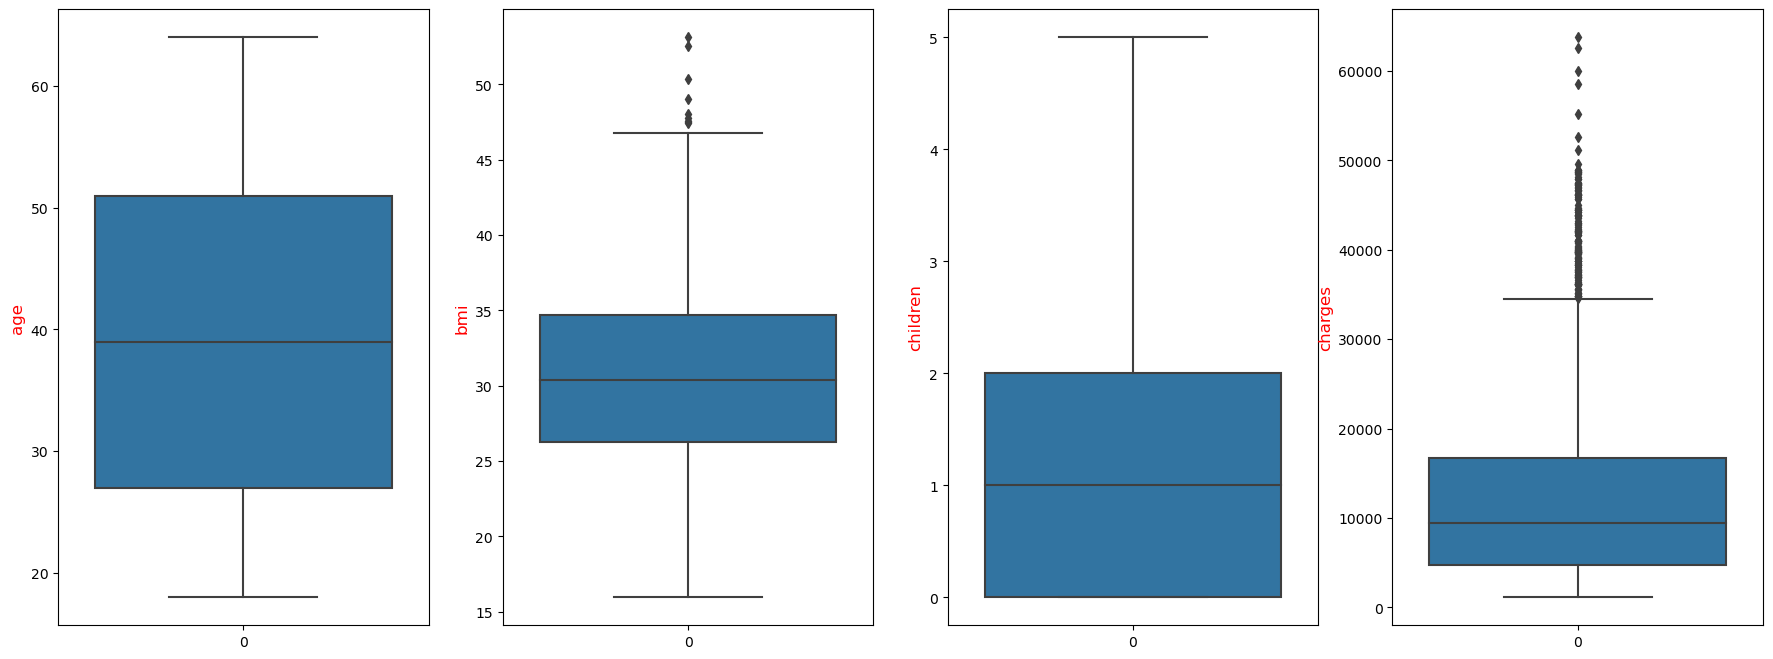

In [2154]:
# Check for outliers
numaric_cols=df.select_dtypes(include=['number']).columns
print(numaric_cols)
   
temp=1
plt.figure(figsize=(22,8))
for i in numaric_cols:
    plt.subplot(1,4,temp)
    plt.ylabel(i,fontsize=12,color='Red')
    sns.boxplot(df[i])
    temp=temp+1
plt.show()

In [2155]:
# Check the skewness
for i in numaric_cols:
    print("skew value",df[i].skew())
    print(df[i])

skew value 0.054780773126998195
0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1337, dtype: int64
skew value 0.28391419385321137
0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1337, dtype: float64
skew value 0.9374206440474123
0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1337, dtype: int64
skew value 1.5153909108403483
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [2156]:
# Handling outliers in BMI column
q1=df['bmi'].quantile(0.25)
print(q1)
q2=df['bmi'].quantile(0.50)
print(q2)
q3=df['bmi'].quantile(0.75)
print(q3)
IQR=q3-q1     
IQR

26.29
30.4
34.7


8.410000000000004

In [2157]:
lower_bound=q1-(1.5*IQR)
upper_bound=q3+(1.5*IQR)
print(lower_bound,upper_bound)

13.674999999999994 47.31500000000001


In [2158]:
#Use clip method to replace the outliers values
bmi_clipped=df['bmi'].clip(lower=lower_bound,upper=upper_bound)
bmi_clipped

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1337, dtype: float64

In [2159]:
# Replace the BMI column with bmi_clipped instead of dropping
df['bmi']=bmi_clipped

<Axes: >

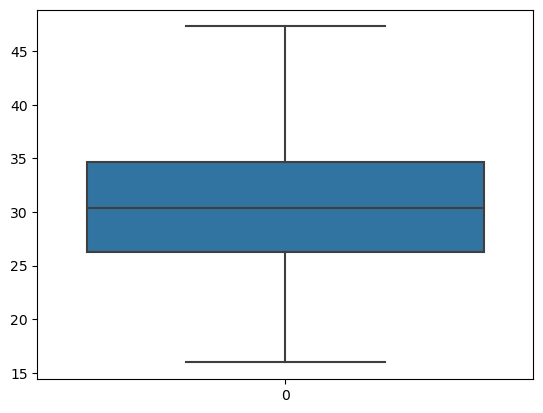

In [2160]:
sns.boxplot(df['bmi'])

In [2161]:
# Handling outliers in charges column
q1=df['charges'].quantile(0.25)
q2=df['charges'].quantile(0.50)
q3=df['charges'].quantile(0.75)
print(q1,q2,q3)

4746.344 9386.1613 16657.71745


In [2162]:
IQR=q3-q1
IQR

11911.37345

In [2163]:
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)
print(lb,ub)

-13120.716174999998 34524.777625


In [2164]:
charges_clipped=df['charges'].clip(lower=lb,upper=ub)

In [2165]:
df['charges']=charges_clipped

In [2166]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.650247,1.095737,12491.159952
std,14.044333,6.059655,1.205571,10165.511950
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,47.315000,5.000000,34524.777625


<Axes: >

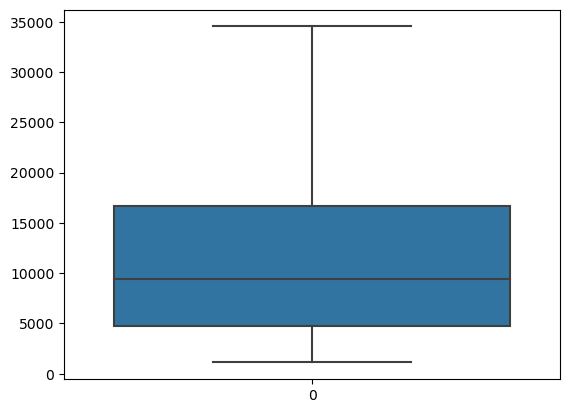

In [2167]:
sns.boxplot(df['charges'])

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


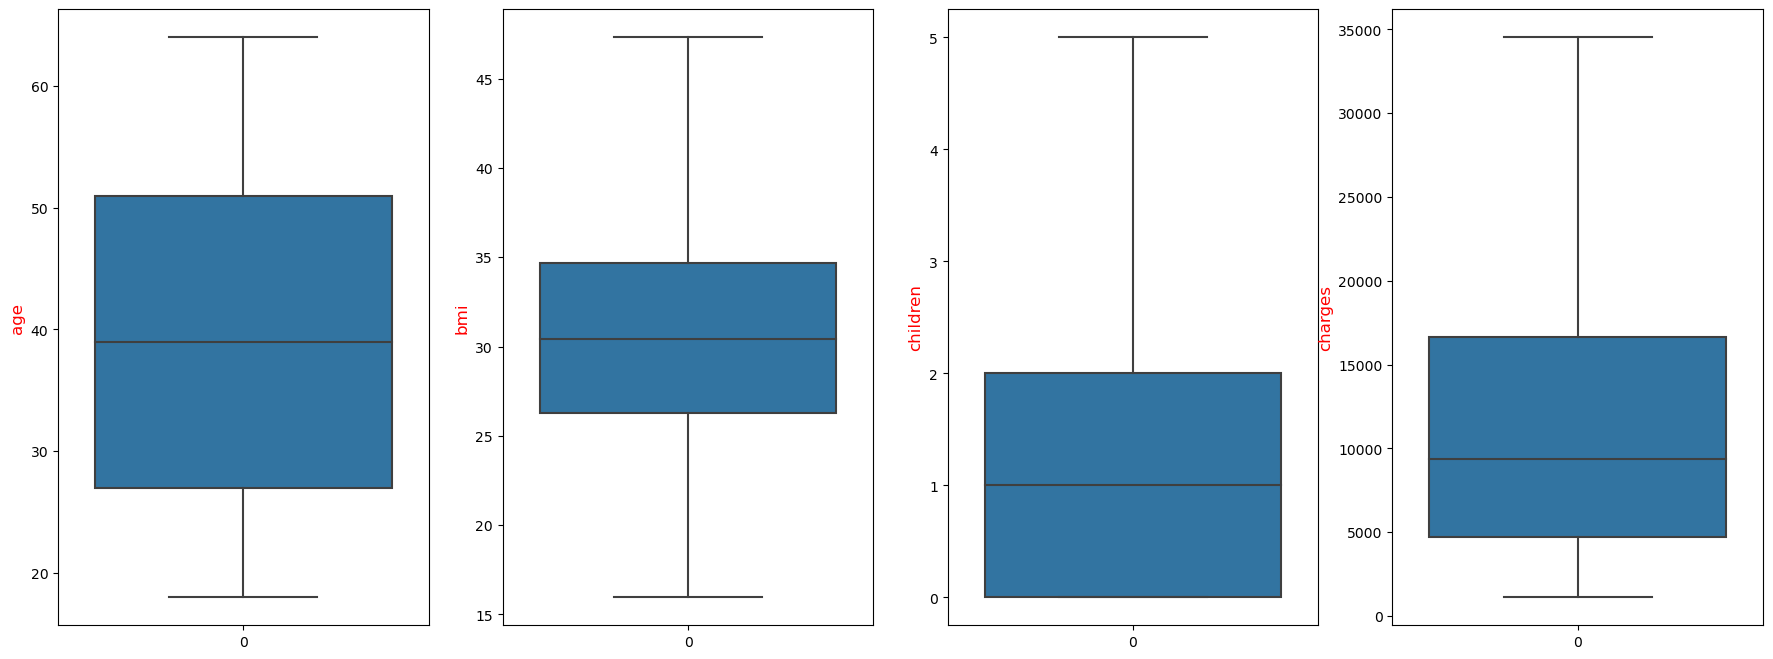

In [2168]:
# Check for outliers
numaric_cols=df.select_dtypes(include=['number']).columns
print(numaric_cols)
   
temp=1
plt.figure(figsize=(22,8))
for i in numaric_cols:
    plt.subplot(1,4,temp)
    plt.ylabel(i,fontsize=12,color='Red')
    sns.boxplot(df[i])
    temp=temp+1
plt.show()

In [2169]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2170]:
# Check the correlation between the columns

cor_matrix=df.corr(numeric_only=True)
cor_matrix

,age,bmi,children,charges
age,1.000000,0.111998,0.041536,0.312423
bmi,0.111998,1.000000,0.013692,0.161220
children,0.041536,0.013692,1.000000,0.072372
charges,0.312423,0.161220,0.072372,1.000000


In [2171]:
cor_matrix['charges']

age         0.312423
bmi         0.161220
children    0.072372
charges     1.000000
Name: charges, dtype: float64

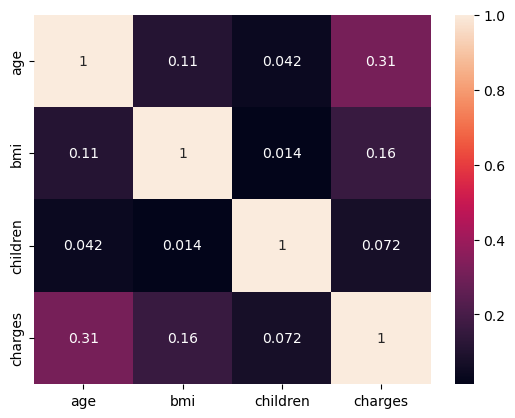

In [2172]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [2173]:
# Check the categorical columns effecting the target variable charges or not

df_group=df.groupby('region').aggregate(total_charges=('charges',np.sum))
df_group

,total_charges
region,
northeast,4.144628e+06
northwest,3.849752e+06
southeast,4.907217e+06
southwest,3.799085e+06


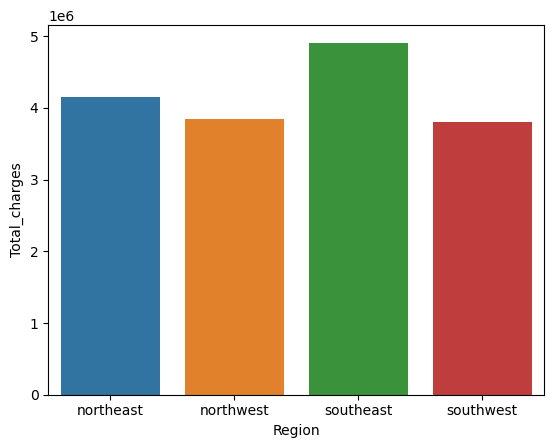

In [2174]:
sns.barplot(data=df_group,x=df_group.index.values,y=df_group['total_charges'])
plt.xlabel('Region')
plt.ylabel('Total_charges')
plt.show()

In [2175]:
df_group_gender=df.groupby('sex').aggregate(total_charges=('charges',np.sum))
df_group_gender

,total_charges
sex,
female,7.907699e+06
male,8.792982e+06


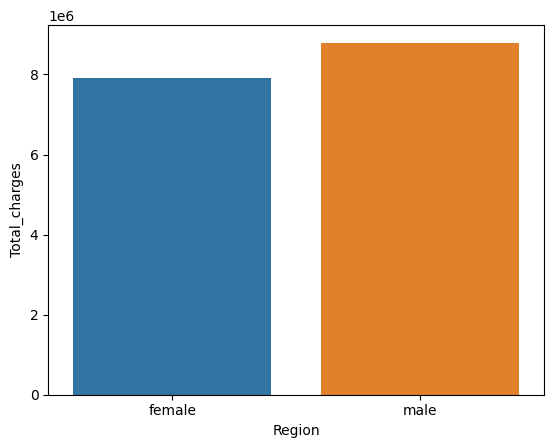

In [2176]:
sns.barplot(data=df_group_gender,x=df_group_gender.index.values,y=df_group_gender['total_charges'])
plt.xlabel('Region')
plt.ylabel('Total_charges')
plt.show()

In [2177]:
# From above graphs we decided that region, chidren and sex columns are not effecting the premium price

In [2178]:
df.drop(columns=['region','children','sex'],inplace=True)

In [2179]:
df.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [2180]:
# Perform Feature Engineering

In [2181]:
# Future scaling(Numarical data)
#1.Standardization(If our data is Normally distributed means distribution is known). it is less sensitive to outliers
#2.Normalization(if the distribution is unknown)

In [2182]:
numeric_cols=df.select_dtypes(include=['number']).columns
numeric_cols

Index(['age', 'bmi', 'charges'], dtype='object')

In [2183]:
non_numeric_cols=df.select_dtypes(exclude=['number']).columns
non_numeric_cols

Index(['smoker'], dtype='object')

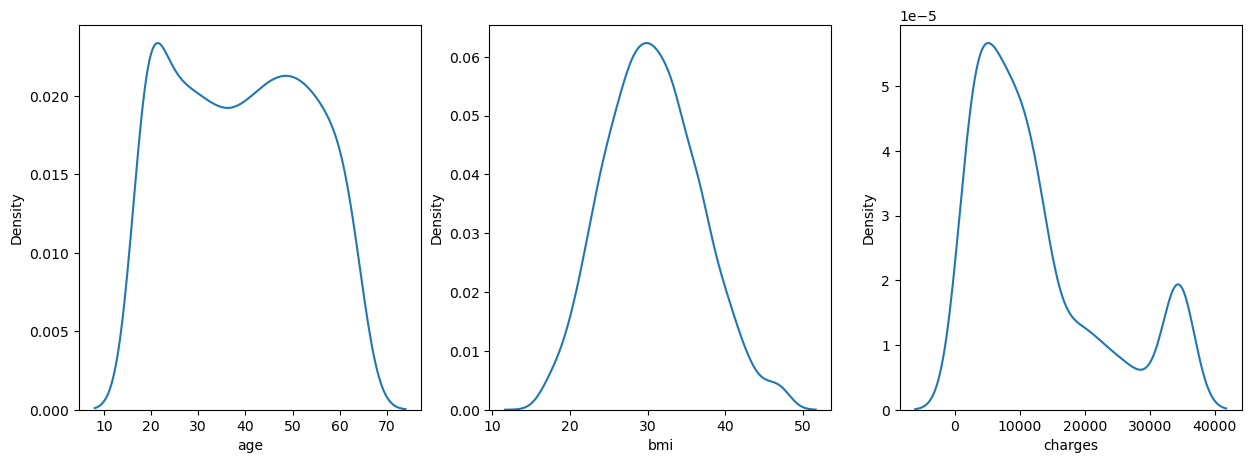

In [2184]:
temp=1
plt.figure(figsize=(15,5))
for i in numeric_cols:
    plt.subplot(1,3,temp)
    sns.kdeplot(df[i])
    temp=temp+1
plt.show()

In [2185]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler1=StandardScaler()
scaler2=MinMaxScaler()

In [2186]:
df[numeric_cols]=scaler1.fit_transform(df[numeric_cols])
df.head()

,age,bmi,smoker,charges
0,-1.440418,-0.454032,yes,0.432384
1,-1.511647,0.515033,no,-1.059429
2,-0.799350,0.387915,no,-0.791373
3,-0.443201,-1.311662,no,0.934224
4,-0.514431,-0.292246,no,-0.848706


In [2187]:
# Minmax_numeric=pd.DataFrame(scaler2.fit_transform(df[numeric_cols]),columns=numeric_cols)
# Minmax_numeric.head()

In [2188]:
## Feature Encoding(On categorical data)
#1. Label Encoding: Where order is not imp for nominal data
#2. ordinal Encoding:For ordinal data
#3. On hot Encoding: Increases the number of features(Curse of dimensionality) and sparase representation(More computational power)

In [2189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['smoker']=le.fit_transform(df['smoker'])
df

,age,bmi,smoker,charges
0,-1.440418,-0.454032,1,0.432384
1,-1.511647,0.515033,0,-1.059429
2,-0.799350,0.387915,0,-0.791373
3,-0.443201,-1.311662,0,0.934224
4,-0.514431,-0.292246,0,-0.848706
...,...,...,...,...
1333,0.767704,0.052787,0,-0.186053
1334,-1.511647,0.209621,0,-1.012150
1335,-1.511647,1.023503,0,-1.068848
1336,-1.297958,-0.800716,0,-1.031639


In [2190]:
le.classes_

array(['no', 'yes'], dtype=object)

In [2191]:
# from sklearn.preprocessing import OrdinalEncoder
# oe=OrdinalEncoder()
# cat_order=[['A','B','C']]
# oe=OrdinalEncoder(categories=cat_order)
# df['non_numeric_column']=oe.fit_transform(df['non_numeric_column'])
# df

In [2192]:
df.head()

,age,bmi,smoker,charges
0,-1.440418,-0.454032,1,0.432384
1,-1.511647,0.515033,0,-1.059429
2,-0.799350,0.387915,0,-0.791373
3,-0.443201,-1.311662,0,0.934224
4,-0.514431,-0.292246,0,-0.848706


In [2193]:
from sklearn.model_selection import train_test_split

x=df.drop(columns='charges')
y=df['charges']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [2194]:
x_train.shape

(1069, 3)

In [2195]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [2196]:
y_train_pred=model.predict(x_train)
y_train_pred

array([-0.88353219, -0.9033979 ,  0.0257001 , ..., -1.00096583,
       -0.47836372, -0.387482  ])

In [2197]:
y_train.head()

1114   -0.993441
968    -0.906471
599     2.064693
170     0.089968
275    -0.273115
Name: charges, dtype: float64

In [2198]:
model.intercept_

-0.39782548639281345

In [2199]:
model.coef_

array([0.31359598, 0.12168245, 1.93263837])

In [2200]:
x_test.shape

(268, 3)

In [2201]:
y_test.head()

900    -0.374179
1064   -0.667436
1256   -0.103764
298     2.168298
237    -0.790020
Name: charges, dtype: float64

In [2202]:
y_test_pred=model.predict(x_test)
y_test_pred[:6]

array([-0.34283691, -0.72761181, -0.01953789,  1.42627716, -0.42600812,
       -0.04161331])

## Performance Metrics

In [2203]:
# R2 score tells us proportation of variance of depemdent variable/predictor variable from the independent varaibles

In [2204]:
from sklearn.metrics import r2_score
r2_test_value=r2_score(y_test,y_test_pred)
r2_test_value

0.8165518569106659

In [2205]:
r2_train_value=r2_score(y_train,y_train_pred)
r2_train_value

0.7214377255832262

In [2206]:
# it means 81% premium charges are in variance with independent variables

In [2207]:
no_of_test_samples=x_test.shape[0]
no_of_test_independent_variables=x_test.shape[1]


adjusted_r2_test=1-(1-r2_test_value)*(no_of_test_samples-1)/(no_of_test_samples-no_of_test_independent_variables-1)
adjusted_r2_test

0.8144672189210144

In [2208]:
no_of_train_samples=x_train.shape[0]
no_of_train_independent_variables=x_train.shape[1]
# print(no_of_train_samples,no_of_train_independent_variables)

adjusted_r2_train=1-(1-r2_train_value)*(no_of_train_samples-1)/(no_of_train_samples-no_of_train_independent_variables-1)
adjusted_r2_train

0.7206530431200804

In [2209]:
from sklearn.metrics import mean_absolute_error
test_mae=mean_absolute_error(y_test,y_test_pred)
test_mae

0.31152840738228693

In [2210]:
train_mae=mean_absolute_error(y_train,y_train_pred)
train_mae

0.3427635483712158

In [2211]:
from sklearn.metrics import mean_squared_error
test_mse=mean_squared_error(y_test,y_test_pred)
test_mse

0.20759740111742886

In [2212]:
y_test

900    -0.374179
1064   -0.667436
1256   -0.103764
298     2.168298
237    -0.790020
          ...   
534     0.131863
542     0.137383
760    -0.842910
1284    2.168298
1285   -0.389353
Name: charges, Length: 268, dtype: float64

In [2213]:
train_mse=mean_squared_error(y_train,y_train_pred)
train_mse

0.2690972138550558

In [2214]:
test_rmse=np.sqrt(test_mse)
test_rmse

0.4556285780297685

In [2215]:
train_rmse=np.sqrt(train_mse)
train_rmse

0.5187458085180601

## Assumptions

### Check the multicollinearity

In [2216]:
#Using Heatmap
x.head() #Independent features

,age,bmi,smoker
0,-1.440418,-0.454032,1
1,-1.511647,0.515033,0
2,-0.799350,0.387915,0
3,-0.443201,-1.311662,0
4,-0.514431,-0.292246,0


In [2217]:
input_mull_corr_matrix=x.corr()
input_mull_corr_matrix

,age,bmi,smoker
age,1.000000,0.111998,-0.025587
bmi,0.111998,1.000000,0.003151
smoker,-0.025587,0.003151,1.000000


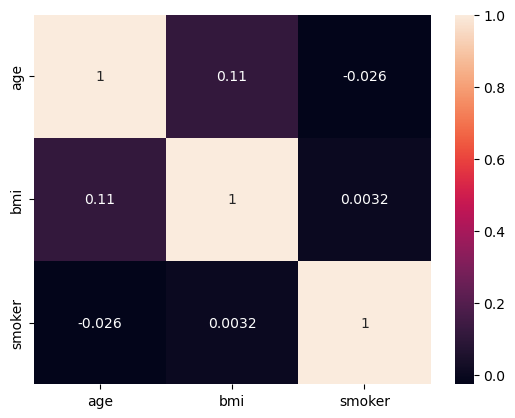

In [2218]:
sns.heatmap(x.corr(),annot=True)
plt.show()

In [2219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2220]:
# 1. VIF=1-->No Multicoolinearity
# 2.1<VIF<5-->Moderate coolinearity(Acceptable)
# 3.VIF>=5-->High coolinearity

In [2221]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x.shape[1])]
vif_data

,Features,VIF
0,age,1.017151
1,bmi,1.016671
2,smoker,1.001849


## Check for Linearity

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


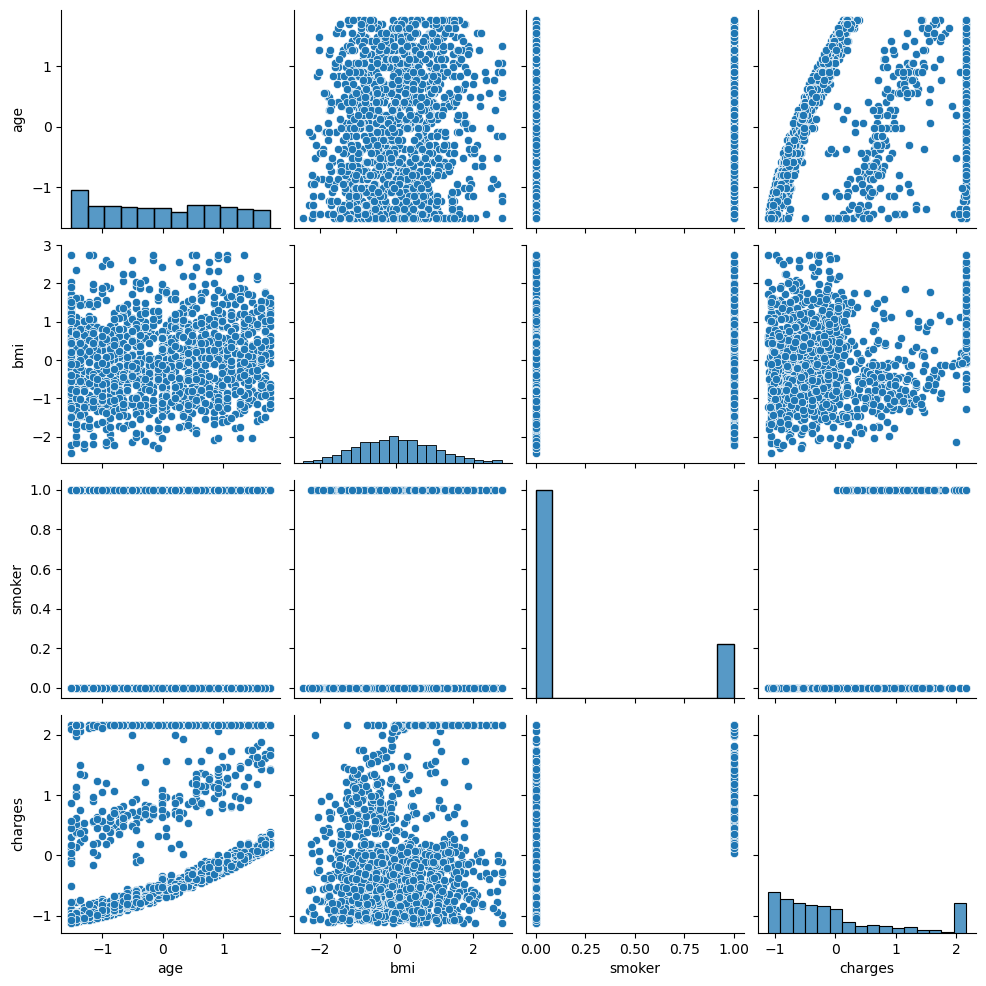

In [2222]:
sns.pairplot(data=df)
plt.show()

## Normality of residue

In [2223]:
residue=[]
a=list(y_train)
b=list(y_train_pred)
for i in range(x_train.shape[0]):
    res=a[i]-b[i]
    residue.append(res)

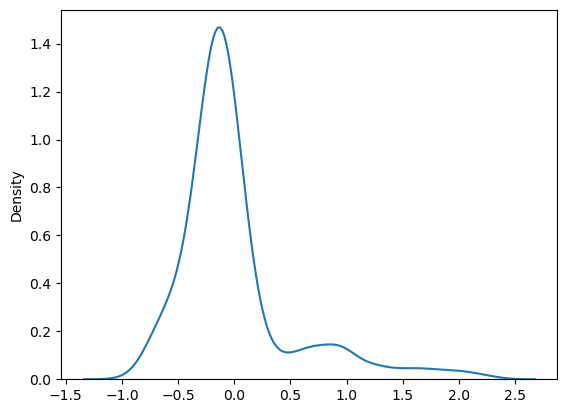

In [2224]:
sns.kdeplot(data=residue)
plt.show()

In [2225]:
residuals=y_test-y_test_pred
residuals

900    -0.031342
1064    0.060176
1256   -0.084226
298     0.742021
237    -0.364012
          ...   
534    -0.221246
542    -0.109420
760    -0.139329
1284    0.033532
1285   -0.038100
Name: charges, Length: 268, dtype: float64

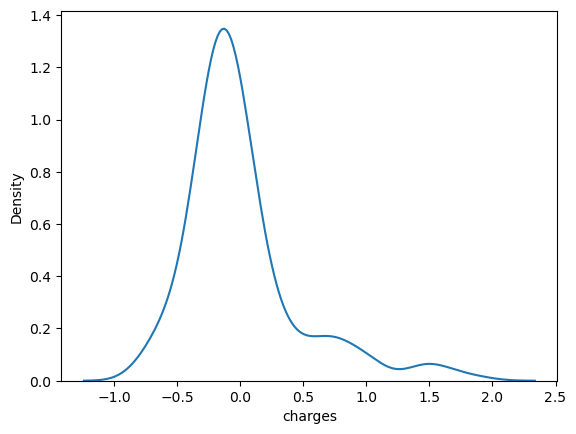

In [2226]:
sns.kdeplot(data=residuals)
plt.show()

### Homoscedasticity

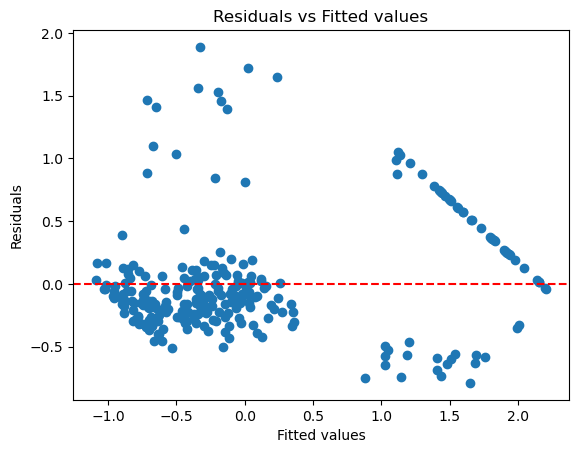

In [2227]:
plt.scatter(x=y_test_pred,y=residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### No Auto Co-relation

In [2228]:
from statsmodels.stats.stattools import durbin_watson
durbin_stats=durbin_watson(residuals)
durbin_stats

2.045680254154307

## OLS Method

In [2229]:
# from statsmodels.regression.linear_model import OLS
# import statsmodels.regression.linear_model as sm
import statsmodels.api as sm

In [2230]:
x_train=sms.add_constant(x_train)
x_test=sms.add_constant(x_test)

In [2231]:
model=sm.OLS(y_train,x_train).fit()
model

In [2232]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     919.4
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          5.84e-295
Time:                        16:49:27   Log-Likelihood:                -815.22
No. Observations:                1069   AIC:                             1638.
Df Residuals:                    1065   BIC:                             1658.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3978      0.018    -22.378      0.000      -0.433      -0.363
age            0.3136      0.016     19.493      0.000       0.282       0.345
bmi            0.1217      0.016      7.522      0.000       0.090       0.153
smoker         1.9326      0.040     48.606      0.000       1.855       2.011
==============================================================================
Omnibus:                      408.023   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.587
Skew:                           1.891   Prob(JB):                    2.67e-300
Kurtosis:                       7.084   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2233]:
y_test_pred=model.predict(x_test)
y_test_pred

900    -0.342837
1064   -0.727612
1256   -0.019538
298     1.426277
237    -0.426008
          ...   
534     0.353109
542     0.246803
760    -0.703581
1284    2.134767
1285   -0.351252
Length: 268, dtype: float64

In [2234]:
y_train_pred=model.predict(x_train)
y_train_pred

1114   -0.883532
968    -0.903398
599     0.025700
170     0.350659
275    -0.305451
          ...   
1096    1.884475
1131   -0.364495
1295   -1.000966
861    -0.478364
1127   -0.387482
Length: 1069, dtype: float64

In [2235]:
from sklearn.metrics import r2_score
y_train_r2_value=r2_score(y_train,y_train_pred)
y_train_r2_value

0.7214377255832262

In [2236]:
from sklearn.metrics import r2_score
y_test_r2_value=r2_score(y_test,y_test_pred)
y_test_r2_value

0.8165518569106659

In [2237]:
from sklearn.metrics import mean_absolute_error
y_train_mae=mean_absolute_error(y_train,y_train_pred)
y_train_mae

0.3427635483712158

In [2238]:
from sklearn.metrics import mean_absolute_error
y_test_mae=mean_absolute_error(y_test,y_test_pred)
y_test_mae

0.31152840738228693

## Gradient descent method

In [2239]:
from sklearn.linear_model import SGDRegressor


sgd=SGDRegressor()

model=sgd.fit(x_train,y_train)

In [2240]:
model

SGDRegressor()

In [2241]:
y_test_pred=model.predict(x_test)
y_test_pred

array([-0.33758783, -0.72156225, -0.00965658,  1.34735131, -0.41568528,
       -0.03138058,  1.21512151, -0.90454928, -0.20365876, -0.21149048,
       -0.09850399,  1.67311498,  1.35418024,  0.36933249, -0.33231495,
       -0.30068069, -0.77158706,  1.47563503, -0.82740725, -0.64008397,
       -0.77158706,  1.32911706,  0.07419404,  1.40177853,  1.41532803,
       -0.73637347,  1.71530126,  1.96299199, -0.16881138, -0.09222206,
       -0.56526634, -0.01801706, -1.0139559 , -0.012305  ,  2.12530572,
       -0.05427564, -0.88378641, -0.81459017,  1.56354635, -0.29160549,
       -0.58792752,  1.3226007 ,  1.64779912, -0.09307483, -0.45701254,
       -0.73982673, -0.66762213, -0.32087314, -0.73706995, -0.36044123,
       -0.59279824, -0.1498025 ,  1.42929845, -0.76484826, -0.22274007,
       -0.28239225, -0.18619287, -0.87395429,  1.41982056, -0.35148012,
        0.04948508, -0.41164907, -0.08236598, -0.95667605,  0.1824895 ,
       -0.22297395, -0.2866087 ,  1.48096263,  0.94255411,  0.24

In [2242]:
y_test

900    -0.374179
1064   -0.667436
1256   -0.103764
298     2.168298
237    -0.790020
          ...   
534     0.131863
542     0.137383
760    -0.842910
1284    2.168298
1285   -0.389353
Name: charges, Length: 268, dtype: float64

In [2243]:
y_test_r2_score=r2_score(y_test,y_test_pred)
y_test_r2_score

0.8108935321759337

In [2244]:
y_train_pred=model.predict(x_train)
y_train_pred

array([-0.87791235, -0.89739008,  0.03597153, ..., -0.99621392,
       -0.47141534, -0.37795505])

In [2245]:
y_train_r2_score=r2_score(y_train,y_train_pred)
y_train_r2_score

0.7200494088616411

## Normalization

In [2246]:
df

,age,bmi,smoker,charges
0,-1.440418,-0.454032,1,0.432384
1,-1.511647,0.515033,0,-1.059429
2,-0.799350,0.387915,0,-0.791373
3,-0.443201,-1.311662,0,0.934224
4,-0.514431,-0.292246,0,-0.848706
...,...,...,...,...
1333,0.767704,0.052787,0,-0.186053
1334,-1.511647,0.209621,0,-1.012150
1335,-1.511647,1.023503,0,-1.068848
1336,-1.297958,-0.800716,0,-1.031639


In [2247]:
# numeric_cols=df2.select_dtypes(include=['number']).columns
# numeric_cols

In [2248]:
# non_numeric_cols=df1.select_dtypes(exclude=['number'])
# non_numeric_cols

In [2249]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [2250]:
df[numeric_cols]=mm.fit_transform(df[numeric_cols])
df

,age,bmi,smoker,charges
0,0.021739,0.380801,1,0.471907
1,0.000000,0.568011,0,0.018073
2,0.217391,0.543454,0,0.099620
3,0.326087,0.215117,0,0.624574
4,0.304348,0.412055,0,0.082178
...,...,...,...,...
1333,0.695652,0.478712,0,0.283768
1334,0.000000,0.509010,0,0.032455
1335,0.000000,0.666241,0,0.015207
1336,0.065217,0.313826,0,0.026527


In [2251]:
x=df.drop(columns='charges')
x

,age,bmi,smoker
0,0.021739,0.380801,1
1,0.000000,0.568011,0
2,0.217391,0.543454,0
3,0.326087,0.215117,0
4,0.304348,0.412055,0
...,...,...,...
1333,0.695652,0.478712,0
1334,0.000000,0.509010,0
1335,0.000000,0.666241,0
1336,0.065217,0.313826,0


In [2252]:
y=df['charges']
y

0       0.471907
1       0.018073
2       0.099620
3       0.624574
4       0.082178
          ...   
1333    0.283768
1334    0.032455
1335    0.015207
1336    0.026527
1337    0.838834
Name: charges, Length: 1337, dtype: float64

In [2253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [2254]:
print(x_train.shape)
print(x_test.shape)

(1069, 3)
(268, 3)


In [2255]:
lg=LinearRegression()

model=lg.fit(x_train,y_train)
model

LinearRegression()

In [2256]:
y_test

900     0.226537
1064    0.137323
1256    0.308801
298     1.000000
237     0.100031
          ...   
534     0.380483
542     0.382162
760     0.083941
1284    1.000000
1285    0.221921
Name: charges, Length: 268, dtype: float64

In [2257]:
y_test_pred=model.predict(x_test)
y_test_pred

array([0.2360716 , 0.11901678, 0.33442445, 0.77426504, 0.21076956,
       0.32770875, 0.7338354 , 0.06350451, 0.2755085 , 0.27380814,
       0.30890785, 0.87400664, 0.77641593, 0.44891499, 0.23614832,
       0.24668769, 0.103081  , 0.81319204, 0.08701937, 0.14340039,
       0.103081  , 0.76934433, 0.35930355, 0.79141107, 0.79482256,
       0.11372643, 0.88555919, 0.96161458, 0.2865805 , 0.30939378,
       0.16600516, 0.33181522, 0.030334  , 0.33448974, 1.00954602,
       0.32107152, 0.06939642, 0.091284  , 0.8413238 , 0.24951081,
       0.15825836, 0.76814484, 0.86546539, 0.30946028, 0.20001025,
       0.11344363, 0.13397961, 0.24043032, 0.11426864, 0.22816004,
       0.15744412, 0.29119686, 0.80007576, 0.10509769, 0.26969089,
       0.25205354, 0.2815933 , 0.07298223, 0.79616702, 0.23105626,
       0.35190902, 0.21240638, 0.3127723 , 0.04747586, 0.3920343 ,
       0.27080047, 0.25014831, 0.81553704, 0.65183655, 0.41207655,
       0.23091304, 0.07185946, 0.19041691, 0.01096694, 0.31632

In [2258]:
y_test_r2_score=r2_score(y_test,y_test_pred)
y_test_r2_score

0.8165518569106659

In [2259]:
y_train_pred=model.predict(x_train)
y_train

1114    0.038147
968     0.064605
599     0.968482
170     0.367738
275     0.257282
          ...   
1096    1.000000
1131    0.076986
1295    0.025235
861     0.180500
1127    0.141145
Name: charges, Length: 1069, dtype: float64

In [2260]:
y_train_r2_score=r2_score(y_train,y_train_pred)
y_train_r2_score

0.7214377255832263